# Softmax Regression
Softmax Regression Is usefull to solve Multi-class classification.  
Now we are going to classifiy Iris data based on softmax regression.  
This is the site I referensed.  
https://wikidocs.net/35476

In [5]:
import pandas as pd

In [31]:
# download the data from https://gist.github.com/netj/8836201
# load as dataframe. 
df = pd.read_csv("./data/iris.csv")
print(df.head())
print("shape :",df.shape)
print("features :",df.columns) # "variety" is a label we are going to classify in this case. 
print("classes :",df["variety"].unique())

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
shape : (150, 5)
features : Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
classes : ['Setosa' 'Versicolor' 'Virginica']


In [32]:
import seaborn as sns

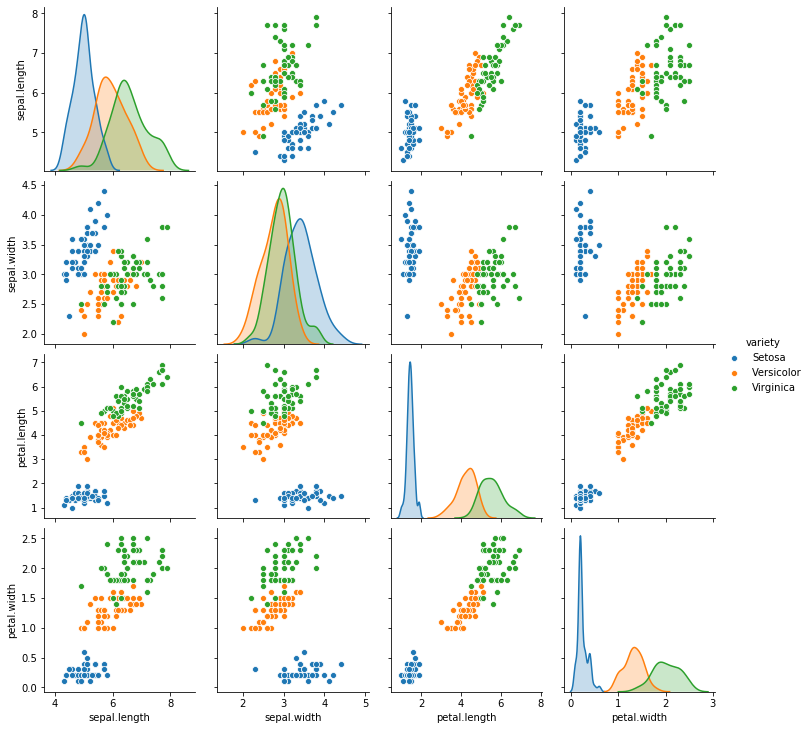

In [33]:
# Try to look the relations between 4 features respectivly to variety.
sns.pairplot(df, hue="variety")

Seems like petal width and length can classify variety well. And by only using sepal width and legth dosn't looks good. But this two features can be used in classification with petal width and length.

In [34]:
# Know lets look at the number of each species.
df["variety"].value_counts()
# So no bias of species in thos data.

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

In [35]:
# Before moving foward, we need to change the species column values in to int. 
df["variety"] = df["variety"].replace(["Virginica", "Setosa", "Versicolor"], [0, 1, 2])

In [10]:
from sklearn.model_selection import train_test_split

In [36]:
# Set X, Y data(features, class)
data_X = df[["sepal.length", "sepal.width", "petal.length", "petal.width"]].to_numpy()
data_Y = df["variety"].to_numpy()
print("data_X :", data_X[:5])
print("data_Y :", data_Y[:5])

data_X : [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
data_Y : [1 1 1 1 1]


In [37]:
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, train_size = 0.8, random_state=1)
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(120, 4) (120,) (30, 4) (30,)


In [18]:
from tensorflow.keras.utils import to_categorical

In [38]:
print("train_X :", train_X[:5], sep="\n")
print("test_X :", test_X[:5], sep="\n")
print("train_Y :",train_Y[:5], sep="\n")
print("test_Y :", test_Y[:5], sep="\n")

train_X :
[[6.1 3.  4.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]]
test_X :
[[5.8 4.  1.2 0.2]
 [5.1 2.5 3.  1.1]
 [6.6 3.  4.4 1.4]
 [5.4 3.9 1.3 0.4]
 [7.9 3.8 6.4 2. ]]
train_Y :
[2 0 2 0 0]
test_Y :
[1 2 2 1 0]


In [39]:
# one-hot encoding of train_Y, test_Y
train_Y_hot = to_categorical(train_Y)
test_Y_hot = to_categorical(test_Y)
print(train_Y_hot[:5])
print(test_Y_hot[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [40]:
# Softmax Regression
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

In [41]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(120, 4) (120,) (30, 4) (30,)


In [43]:
model = Sequential()
model.add(Dense(3, input_dim = 4, activation = "softmax"))
sgd = optimizers.SGD(learning_rate= 0.01)
model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics= ["accuracy"])
model.summary()
# history = model.fit(train_X, train_Y)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
